<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/ANN-project/blob/main/Robot3bactudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
import matplotlib.pyplot as plt
import math
import csv
import numpy as np

In [288]:
z=[]

for a in range(0,181,1):
  for b in range(0,181,1):
    c = 90 - a - b
    x=50*math.cos(math.radians(a))+40*math.cos(math.radians(a+b))+20*math.cos(math.radians(a+b+c))
    y=50*math.sin(math.radians(a))+40*math.sin(math.radians(a+b))+20*math.sin(math.radians(a+b+c))
    #chuan hoa du lieu ve 0 va 1
    a = a/180
    b = b/180
    c = (c+180.0)/270.0
    x = (x+110)/220
    y = (y+110)/220
    z.append(np.array((a,b,c,x,y)))

    
    

In [289]:
header = ['goc1', 'goc2','goc3', 'x', 'y']
with open('data3.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(z)

In [290]:
data = pd.read_csv('data3.csv')
numpy_dataset = data.values
y=numpy_dataset[:,:3]
x=numpy_dataset[:,3:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
x_train.shape









(26208, 2)

In [291]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3))

In [292]:
model.compile(loss='mae', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)

Epoch 1/10
656/656 [==============================] - 7s 10ms/step - loss: 0.0463 - acc: 0.9116 - val_loss: 0.0100 - val_acc: 0.9928
Epoch 2/10
656/656 [==============================] - 5s 7ms/step - loss: 0.0094 - acc: 0.9892 - val_loss: 0.0106 - val_acc: 0.9905
Epoch 3/10
656/656 [==============================] - 3s 5ms/step - loss: 0.0066 - acc: 0.9925 - val_loss: 0.0105 - val_acc: 0.9901
Epoch 4/10
656/656 [==============================] - 4s 6ms/step - loss: 0.0062 - acc: 0.9925 - val_loss: 0.0058 - val_acc: 0.9992
Epoch 5/10
656/656 [==============================] - 3s 5ms/step - loss: 0.0059 - acc: 0.9928 - val_loss: 0.0055 - val_acc: 0.9918
Epoch 6/10
656/656 [==============================] - 4s 6ms/step - loss: 0.0054 - acc: 0.9923 - val_loss: 0.0031 - val_acc: 0.9924
Epoch 7/10
656/656 [==============================] - 5s 7ms/step - loss: 0.0049 - acc: 0.9946 - val_loss: 0.0051 - val_acc: 0.9918
Epoch 8/10
656/656 [==============================] - 4s 6ms/step - loss: 0

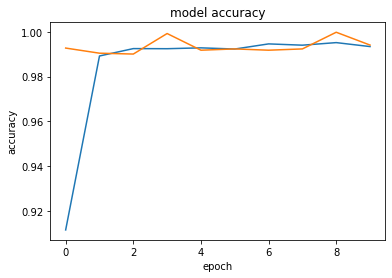

In [293]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [294]:
score = model.evaluate(x_test,y_test,verbose = 0)
print('Sai so kiem tra la:',score[0])
print('Do chinh xac kiem tra', score[1])

Sai so kiem tra la: 0.007834047079086304
Do chinh xac kiem tra 0.9952693581581116


In [296]:
Px = (40+110)/220
Py = (50+110)/220
test = model.predict([[Px,Py]])
t1 = test[0][0]*180
t2 = test[0][1]*180
t3 =  test[0][2]*270.0-180.0
x_1=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))+20*math.cos(math.radians(t1+t2+t3))
y_1=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))+20*math.sin(math.radians(t1+t2+t3)) 
print('x = ',x_1,'y = ',y_1)
print(t1,t2,t3)

x =  44.67666939962811 y =  58.744805259537074
-0.18551766872406006 102.16102838516235 -20.534858107566833
